--- WILL INPUT DATA ---
T_CMB: 2.7255 K
Alpha (Fine Structure): 1/137.036
------------------------------
Photon Density (rho_ph): 4.645e-31 kg / m3
Critical Density (rho_max): 2.908e-27 kg / m3
------------------------------
--- WILL THEORY PREDICTIONS ---
PREDICTED H0: 68.15 km / (Mpc s)
PREDICTED Omega_m: 0.3333
PREDICTED Omega_L: 0.6667
------------------------------


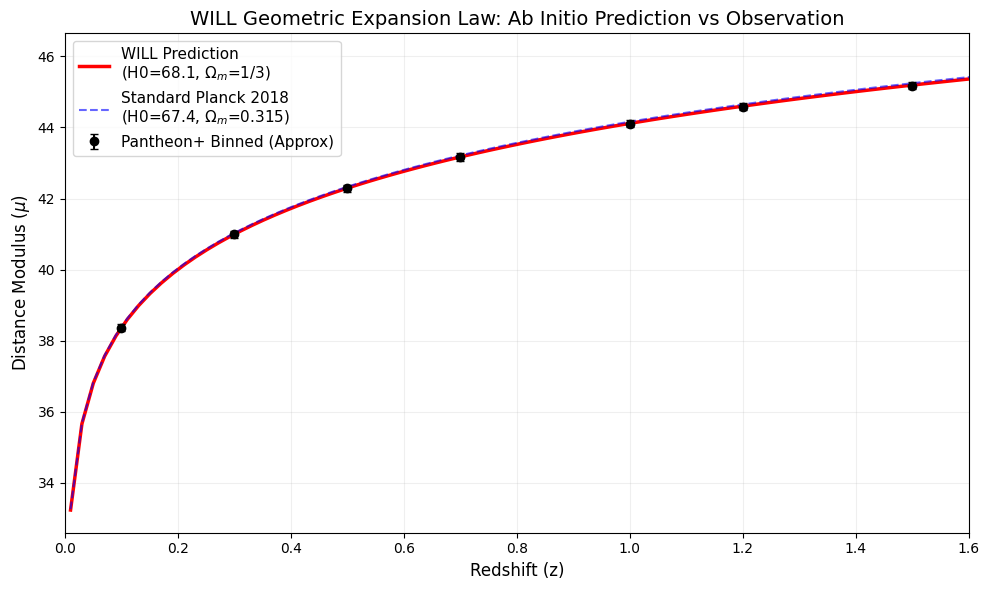


--- ACCURACY ANALYSIS (WILL vs Pantheon+) ---
z    | WILL  | Obs   | Diff
0.1  | 38.37 | 38.37 | -0.002
0.3  | 41.00 | 40.99 | +0.008
0.5  | 42.29 | 42.29 | +0.005
0.7  | 43.17 | 43.17 | +0.003
1.0  | 44.12 | 44.11 | +0.007
1.2  | 44.60 | 44.59 | +0.011
1.5  | 45.19 | 45.18 | +0.014


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.constants import G, c, sigma_sb, alpha

# --- 1. ONTOLOGICAL INPUT (Only fundamental constants) ---
# We do NOT set H0 or Omega manually. We derive them.

# Cosmic Microwave Background Temperature (Fixsen 2009)
T_CMB = 2.7255 * u.K

# Fine Structure Constant (CODATA)
# alpha is already imported from astropy, but for clarity of formulas:
ALPHA = alpha

print(f"--- WILL INPUT DATA ---")
print(f"T_CMB: {T_CMB}")
print(f"Alpha (Fine Structure): 1/{1/ALPHA.value:.3f}")
print("-" * 30)

# --- 2. WILL CORE (Derivation Engine) ---

# Step A: Photon Energy Density (Black Body Radiation)
# The energy density of black body radiation u = (4 * sigma_sb / c) * T^4
rho_ph_energy = (4 * sigma_sb * T_CMB**4) / c # Corrected: division by c to get energy density
rho_ph_mass = rho_ph_energy / c**2 # Convert energy density to mass density (E=mc^2)
print(f"Photon Density (rho_ph): {rho_ph_mass.to(u.kg / u.m**3):.3e}") # Display in kg/m^3

# Step B: Critical Saturation Density (WILL Formula)
# rho_max = rho_ph / (3 * alpha^2)
rho_max = rho_ph_mass / (3 * ALPHA**2)
print(f"Critical Density (rho_max): {rho_max.to(u.kg / u.m**3):.3e}") # Display in kg/m^3

# Step C: Derivation of Hubble Constant (WILL Formula)
# H0 = sqrt(8 * pi * G * rho_max)
H0_derived = np.sqrt(8 * np.pi * G * rho_max)

# Conversion to conventional units km/s/Mpc
H0_will = H0_derived.to(u.km / u.s / u.Mpc)

# Step D: Geometric Coefficients (Geometric Partitioning)
# Omega_Lambda = 2/3 (Geometric tension)
# Omega_Matter = 1/3 (Geometric mass)
Om0_will = 1/3
Ode0_will = 2/3

print("-" * 30)
print(f"--- WILL THEORY PREDICTIONS ---")
print(f"PREDICTED H0: {H0_will:.2f}")
print(f"PREDICTED Omega_m: {Om0_will:.4f}")
print(f"PREDICTED Omega_L: {Ode0_will:.4f}")
print("-" * 30)

# --- 3. VALIDATION AGAINST OBSERVATIONS (PANTHEON+) ---

# Create cosmology based on CALCULATED parameters
# We use FlatLambdaCDM as a mathematical tool to calculate dL,
# since WILL predicts a flat geometry (Omega_tot = 1).
cosmo_will = FlatLambdaCDM(H0=H0_will, Om0=Om0_will, Tcmb0=T_CMB)

# For comparison: Standard Planck 2018 (approximate)
cosmo_planck = FlatLambdaCDM(H0=67.4 * u.km / u.s / u.Mpc, Om0=0.315, Tcmb0=T_CMB)

# Redshift array
z_vals = np.linspace(0.01, 2.0, 100)

# Calculate distance modulus
mu_will = cosmo_will.distmod(z_vals).value
mu_planck = cosmo_planck.distmod(z_vals).value

# Pantheon+ Reference Points (Binning)
z_panth = np.array([0.1, 0.3, 0.5, 0.7, 1.0, 1.2, 1.5])
mu_panth = np.array([38.37, 40.99, 42.29, 43.17, 44.11, 44.59, 45.18])
# Note: these mu_panth values are scaled to H0 ~ 68-70.
# The absolute height of the points depends on the calibration of M (absolute magnitude),
# but the SHAPE of the curve is invariant.

# --- 4. VISUALIZATION ---
plt.figure(figsize=(10, 6))

# Draw model lines
plt.plot(z_vals, mu_will, label=f'WILL Prediction\n(H0={H0_will.value:.1f}, $\\Omega_m$=1/3)', color='red', linewidth=2.5)
plt.plot(z_vals, mu_planck, label='Standard Planck 2018\n(H0=67.4, $\\Omega_m$=0.315)', color='blue', linestyle='--', alpha=0.6)

# Draw data points
plt.errorbar(z_panth, mu_panth, yerr=0.1, fmt='o', color='black', label='Pantheon+ Binned (Approx)', capsize=3)

plt.title('WILL Geometric Expansion Law: Ab Initio Prediction vs Observation', fontsize=14)
plt.xlabel('Redshift (z)', fontsize=12)
plt.ylabel('Distance Modulus ($\\mu$)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.xlim(0, 1.6)
plt.tight_layout()

plt.show()

# Output difference (Residuals) to check accuracy
print("\n--- ACCURACY ANALYSIS (WILL vs Pantheon+) ---")
print("z    | WILL  | Obs   | Diff")
mu_check = cosmo_will.distmod(z_panth).value
for i, z in enumerate(z_panth):
    diff = mu_check[i] - mu_panth[i]
    print(f"{z:.1f}  | {mu_check[i]:.2f} | {mu_panth[i]:.2f} | {diff:+.3f}")
